In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

#Reading in the Netcdf file
data = Dataset(r'C:\Users\dell\wind_prediction_project\netcdf data visualization\data.nc\era5_wind_102014.nc')

In [5]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2024-06-22 14:01:34 GMT by grib_to_netcdf-2.28.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data5/adaptor.mars.internal-1719064685.4273188-24557-1-6a8f3fb8-78c8-41c8-8103-405fc4856d2e.nc /cache/tmp/6a8f3fb8-78c8-41c8-8103-405fc4856d2e-adaptor.mars.internal-1719062421.8711703-24557-1-tmp.grib
    dimensions(sizes): longitude(115), latitude(117), time(8760)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u100(time, latitude, longitude), int16 v100(time, latitude, longitude), int16 u10(time, latitude, longitude), int16 v10(time, latitude, longitude), int16 t2m(time, latitude, longitude), int16 sp(time, latitude, longitude)
    groups: 


In [7]:
#DISPLAYING THE NAME OF THE VARIABLES 
print(data.variables.keys())

dict_keys(['longitude', 'latitude', 'time', 'u100', 'v100', 'u10', 'v10', 't2m', 'sp'])


In [11]:
lon = data.variables['longitude']
#ACCESSING THE VARIABLES 
print(lon)

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (115,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [15]:
lat = data.variables['latitude']
print(lat)

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (117,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [19]:
sp = data.variables['sp']
print(sp)

<class 'netCDF4._netCDF4.Variable'>
int16 sp(time, latitude, longitude)
    scale_factor: 0.8246315906680604
    add_offset: 75343.94119982967
    _FillValue: -32767
    missing_value: -32767
    units: Pa
    long_name: Surface pressure
    standard_name: surface_air_pressure
unlimited dimensions: 
current shape = (8760, 117, 115)
filling on


In [21]:
time = data.variables['time']
print(time)

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (8760,)
filling on, default _FillValue of -2147483647 used


In [23]:
t2m = data.variables['t2m']
print(t2m)

<class 'netCDF4._netCDF4.Variable'>
int16 t2m(time, latitude, longitude)
    scale_factor: 0.0014576559389985293
    add_offset: 274.1925542530852
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: 2 metre temperature
unlimited dimensions: 
current shape = (8760, 117, 115)
filling on


In [25]:
#ACCESSING THE DATA FROM THE VARIABLES 
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
time_data = data.variables['time'][:]
print(time_data)
time_series = pd.Series(time_data, index=range(len(time_data)))
print(time_series)

[ 999312  999313  999314 ... 1008069 1008070 1008071]
0        999312
1        999313
2        999314
3        999315
4        999316
5        999317
6        999318
7        999319
8        999320
9        999321
10       999322
11       999323
12       999324
13       999325
14       999326
15       999327
16       999328
17       999329
18       999330
19       999331
20       999332
21       999333
22       999334
23       999335
24       999336
25       999337
26       999338
27       999339
28       999340
29       999341
30       999342
31       999343
32       999344
33       999345
34       999346
35       999347
36       999348
37       999349
38       999350
39       999351
40       999352
41       999353
42       999354
43       999355
44       999356
45       999357
46       999358
47       999359
48       999360
49       999361
50       999362
51       999363
52       999364
53       999365
54       999366
55       999367
56       999368
57       999369
58       999370
59

In [27]:
lon_data = data.variables['longitude'][:]
print(lon_data)


[68.7  68.95 69.2  69.45 69.7  69.95 70.2  70.45 70.7  70.95 71.2  71.45
 71.7  71.95 72.2  72.45 72.7  72.95 73.2  73.45 73.7  73.95 74.2  74.45
 74.7  74.95 75.2  75.45 75.7  75.95 76.2  76.45 76.7  76.95 77.2  77.45
 77.7  77.95 78.2  78.45 78.7  78.95 79.2  79.45 79.7  79.95 80.2  80.45
 80.7  80.95 81.2  81.45 81.7  81.95 82.2  82.45 82.7  82.95 83.2  83.45
 83.7  83.95 84.2  84.45 84.7  84.95 85.2  85.45 85.7  85.95 86.2  86.45
 86.7  86.95 87.2  87.45 87.7  87.95 88.2  88.45 88.7  88.95 89.2  89.45
 89.7  89.95 90.2  90.45 90.7  90.95 91.2  91.45 91.7  91.95 92.2  92.45
 92.7  92.95 93.2  93.45 93.7  93.95 94.2  94.45 94.7  94.95 95.2  95.45
 95.7  95.95 96.2  96.45 96.7  96.95 97.2 ]


In [29]:
lat_data = data.variables['latitude'][:]
print(lat_data)


[37.4  37.15 36.9  36.65 36.4  36.15 35.9  35.65 35.4  35.15 34.9  34.65
 34.4  34.15 33.9  33.65 33.4  33.15 32.9  32.65 32.4  32.15 31.9  31.65
 31.4  31.15 30.9  30.65 30.4  30.15 29.9  29.65 29.4  29.15 28.9  28.65
 28.4  28.15 27.9  27.65 27.4  27.15 26.9  26.65 26.4  26.15 25.9  25.65
 25.4  25.15 24.9  24.65 24.4  24.15 23.9  23.65 23.4  23.15 22.9  22.65
 22.4  22.15 21.9  21.65 21.4  21.15 20.9  20.65 20.4  20.15 19.9  19.65
 19.4  19.15 18.9  18.65 18.4  18.15 17.9  17.65 17.4  17.15 16.9  16.65
 16.4  16.15 15.9  15.65 15.4  15.15 14.9  14.65 14.4  14.15 13.9  13.65
 13.4  13.15 12.9  12.65 12.4  12.15 11.9  11.65 11.4  11.15 10.9  10.65
 10.4  10.15  9.9   9.65  9.4   9.15  8.9   8.65  8.4 ]


In [31]:
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
print(lat)
print(lon)
print(len(lat))
print(len(lon))


[37.4  37.15 36.9  36.65 36.4  36.15 35.9  35.65 35.4  35.15 34.9  34.65
 34.4  34.15 33.9  33.65 33.4  33.15 32.9  32.65 32.4  32.15 31.9  31.65
 31.4  31.15 30.9  30.65 30.4  30.15 29.9  29.65 29.4  29.15 28.9  28.65
 28.4  28.15 27.9  27.65 27.4  27.15 26.9  26.65 26.4  26.15 25.9  25.65
 25.4  25.15 24.9  24.65 24.4  24.15 23.9  23.65 23.4  23.15 22.9  22.65
 22.4  22.15 21.9  21.65 21.4  21.15 20.9  20.65 20.4  20.15 19.9  19.65
 19.4  19.15 18.9  18.65 18.4  18.15 17.9  17.65 17.4  17.15 16.9  16.65
 16.4  16.15 15.9  15.65 15.4  15.15 14.9  14.65 14.4  14.15 13.9  13.65
 13.4  13.15 12.9  12.65 12.4  12.15 11.9  11.65 11.4  11.15 10.9  10.65
 10.4  10.15  9.9   9.65  9.4   9.15  8.9   8.65  8.4 ]
[68.7  68.95 69.2  69.45 69.7  69.95 70.2  70.45 70.7  70.95 71.2  71.45
 71.7  71.95 72.2  72.45 72.7  72.95 73.2  73.45 73.7  73.95 74.2  74.45
 74.7  74.95 75.2  75.45 75.7  75.95 76.2  76.45 76.7  76.95 77.2  77.45
 77.7  77.95 78.2  78.45 78.7  78.95 79.2  79.45 79.7  79.95 80.2  8

In [33]:
lat_series = pd.Series(lat, index=range(len(lat)))
print(lat_series)
lon_series = pd.Series(lon, index=range(len(lon)))
print(lon_series)

0      37.400002
1      37.150002
2      36.900002
3      36.650002
4      36.400002
5      36.150002
6      35.900002
7      35.650002
8      35.400002
9      35.150002
10     34.900002
11     34.650002
12     34.400002
13     34.150002
14     33.900002
15     33.650002
16     33.400002
17     33.150002
18     32.900002
19     32.650002
20     32.400002
21     32.150002
22     31.900000
23     31.650000
24     31.400000
25     31.150000
26     30.900000
27     30.650000
28     30.400000
29     30.150000
30     29.900000
31     29.650000
32     29.400000
33     29.150000
34     28.900000
35     28.650000
36     28.400000
37     28.150000
38     27.900000
39     27.650000
40     27.400000
41     27.150000
42     26.900000
43     26.650000
44     26.400000
45     26.150000
46     25.900000
47     25.650000
48     25.400000
49     25.150000
50     24.900000
51     24.650000
52     24.400000
53     24.150000
54     23.900000
55     23.650000
56     23.400000
57     23.150000
58     22.9000

In [35]:
lat_agra = 27.176670
lon_agra = 78.008072
print(lat_agra)
print(lon_agra)

27.17667
78.008072


In [37]:
sq_diff_lat = (lat - lat_agra)**2
sq_diff_lon = (lat - lon_agra)**2
print(sq_diff_lat)
print(sq_diff_lon)
lat_sq_series = pd.Series(sq_diff_lat, index=range(len(sq_diff_lat)))
print(lat_sq_series)
lon_sq_series = pd.Series(sq_diff_lon , index=range(len(sq_diff_lon )))
print(lon_sq_series)

[1.04516502e+02 9.94673386e+01 9.45431747e+01 8.97440109e+01
 8.50698395e+01 8.05206757e+01 7.60965118e+01 7.17973480e+01
 6.76231766e+01 6.35740128e+01 5.96498489e+01 5.58506813e+01
 5.21765175e+01 4.86273499e+01 4.52031860e+01 4.19040184e+01
 3.87298546e+01 3.56806870e+01 3.27565231e+01 2.99573574e+01
 2.72831917e+01 2.47340260e+01 2.23098412e+01 2.00106773e+01
 1.78365116e+01 1.57873478e+01 1.38631830e+01 1.20640182e+01
 1.03898535e+01 8.84068871e+00 7.41652393e+00 6.11735916e+00
 4.94319439e+00 3.89402938e+00 2.96986461e+00 2.17069983e+00
 1.49653518e+00 9.47370410e-01 5.23205638e-01 2.24040851e-01
 4.98760864e-02 7.11313216e-04 7.65465423e-02 2.77381778e-01
 6.03217006e-01 1.05405223e+00 1.62988746e+00 2.33072257e+00
 3.15655780e+00 4.10739326e+00 5.18322849e+00 6.38406372e+00
 7.70989895e+00 9.16073418e+00 1.07365694e+01 1.24374046e+01
 1.42632399e+01 1.62140751e+01 1.82899094e+01 2.04907455e+01
 2.28165798e+01 2.52674160e+01 2.78432503e+01 3.05440865e+01
 3.33699226e+01 3.632075

In [39]:
min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()
print(min_index_lat)
print(min_index_lon)

41
0


In [41]:
m2_temp = data.variables['t2m']  # Assuming 'data' is your netCDF dataset

# Accessing specific values using array indexing
value_at_index_0_41_0 = m2_temp[0, 41, 0]
units = m2_temp.units  # Get the units from the variable

# Print the value with units
print("Value at index (0, 41, 0):", value_at_index_0_41_0, units)

Value at index (0, 41, 0): 276.7230449631866 K


In [43]:
time = data.variables['time'].units
print(time)

hours since 1900-01-01 00:00:00.0


In [45]:
surface_pressure = data.variables['sp']  # Assuming 'data' is your netCDF dataset

# Accessing specific values using array indexing
value_at_index_0_41_0 = surface_pressure[0, 41, 0]
units = surface_pressure.units  # Get the units from the variable

# Print the value with units
print("Value at index (0, 41, 0):", value_at_index_0_41_0, units)

Value at index (0, 41, 0): 101522.69567717792 Pa


In [47]:
import pandas as pd

# Generate date range for 2014 with hourly frequency
date_range_2014 = pd.date_range(start='2014-01-01', end='2014-12-31 23:00:00', freq='h')

# Print the date range
print(date_range_2014)

# Check the number of rows
print(f"Number of rows: {len(date_range_2014)}")


DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='h')
Number of rows: 8760


In [49]:
df = pd.DataFrame(0, columns = ['Surf_pressure'], index = date_range_2014)
print (df)

                     Surf_pressure
2014-01-01 00:00:00              0
2014-01-01 01:00:00              0
2014-01-01 02:00:00              0
2014-01-01 03:00:00              0
2014-01-01 04:00:00              0
2014-01-01 05:00:00              0
2014-01-01 06:00:00              0
2014-01-01 07:00:00              0
2014-01-01 08:00:00              0
2014-01-01 09:00:00              0
2014-01-01 10:00:00              0
2014-01-01 11:00:00              0
2014-01-01 12:00:00              0
2014-01-01 13:00:00              0
2014-01-01 14:00:00              0
2014-01-01 15:00:00              0
2014-01-01 16:00:00              0
2014-01-01 17:00:00              0
2014-01-01 18:00:00              0
2014-01-01 19:00:00              0
2014-01-01 20:00:00              0
2014-01-01 21:00:00              0
2014-01-01 22:00:00              0
2014-01-01 23:00:00              0
2014-01-02 00:00:00              0
2014-01-02 01:00:00              0
2014-01-02 02:00:00              0
2014-01-02 03:00:00 

In [51]:
dt = np.arange(0, data.variables['time'].size)
print(dt)

[   0    1    2 ... 8757 8758 8759]


In [53]:
date_range_2014 = pd.date_range(start='2014-01-01', end='2014-12-31 23:00:00', freq='h')

# Create a DataFrame with the date range as the index and initialize Surf_pressure column with zeros
df = pd.DataFrame(index=date_range_2014, columns=['Surf_pressure'])

# Create a time index based on the size of the time variable
dt = np.arange(0, data.variables['time'].size)

# Print the time index for verification
print(dt)

# Fill the DataFrame with surface pressure values
for time_index in dt:
    df.iloc[time_index] = surface_pressure[time_index, min_index_lat, min_index_lon]

# Reset the index to add a numerical index column named 'Hours'
df.reset_index(inplace=True)

# Rename the columns for clarity
df.columns = ['Datetime', 'Surf_pressure']

# Add a numerical index column named 'Hours'
df.insert(0, 'Hours', df.index)

# Remove the default numerical index
df.set_index('Hours', inplace=True)

# Print the DataFrame
print(df)

[   0    1    2 ... 8757 8758 8759]
                 Datetime  Surf_pressure
Hours                                   
0     2014-01-01 00:00:00  101522.695677
1     2014-01-01 01:00:00  101563.927257
2     2014-01-01 02:00:00  101629.897784
3     2014-01-01 03:00:00   101731.32747
4     2014-01-01 04:00:00  101804.719681
5     2014-01-01 05:00:00  101901.201577
6     2014-01-01 06:00:00  101889.656735
7     2014-01-01 07:00:00   101830.28326
8     2014-01-01 08:00:00  101693.394416
9     2014-01-01 09:00:00  101587.016941
10    2014-01-01 10:00:00  101493.833572
11    2014-01-01 11:00:00  101490.535045
12    2014-01-01 12:00:00  101450.952729
13    2014-01-01 13:00:00  101434.460097
14    2014-01-01 14:00:00  101496.307466
15    2014-01-01 15:00:00  101561.453362
16    2014-01-01 16:00:00  101609.281994
17    2014-01-01 17:00:00  101659.584521
18    2014-01-01 18:00:00  101638.968731
19    2014-01-01 19:00:00  101640.617995
20    2014-01-01 20:00:00  101618.352942
21    2014-01-01 21:0

In [72]:
df.to_csv('surface_pressure_agra.csv')

In [100]:
from netCDF4 import Dataset
import glob

data_dir = r'C:\Users\dell\wind_prediction_project\netcdf data visualization'
all_years = []

# Change directory to the data directory
import os
os.chdir(data_dir)

# Iterate over each .nc file in the directory
for file in glob.glob('*.nc'):
    print(file)
    data = Dataset(file, 'r')
    time = data.variables['time']
    year = file[12:16]  # Assuming the year is always at this position in the filename
    year_with_extension = f'{year}.nc'  # Append .nc to the year
    all_years.append(year_with_extension)
    print(year_with_extension)

    # Close the dataset after use
    data.close()


era5_wind_102014.nc
2014.nc
era5_wind_102015.nc
2015.nc
era5_wind_102016.nc
2016.nc
era5_wind_102017.nc
2017.nc
era5_wind_102018.nc
2018.nc
era5_wind_102019.nc
2019.nc
era5_wind_102020.nc
2020.nc
era5_wind_102021.nc
2021.nc
era5_wind_102022.nc
2022.nc
era5_wind_102023.nc
2023.nc


In [92]:
import pandas as pd

# Example values for demonstration (replace with your actual variables)
year_start = 2014
end_year = 2023

# Create date range
date_range = pd.date_range(start=f'{year_start}-01-01 00:00:00',
                           end=f'{end_year}-12-31 23:00:00',
                           freq='h')

# Print the date range
print(date_range)


DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', length=87648, freq='h')


In [94]:
df = pd.DataFrame(0.0 , columns = ['temp2m'], index = date_range)
print(df)


                     temp2m
2014-01-01 00:00:00     0.0
2014-01-01 01:00:00     0.0
2014-01-01 02:00:00     0.0
2014-01-01 03:00:00     0.0
2014-01-01 04:00:00     0.0
2014-01-01 05:00:00     0.0
2014-01-01 06:00:00     0.0
2014-01-01 07:00:00     0.0
2014-01-01 08:00:00     0.0
2014-01-01 09:00:00     0.0
2014-01-01 10:00:00     0.0
2014-01-01 11:00:00     0.0
2014-01-01 12:00:00     0.0
2014-01-01 13:00:00     0.0
2014-01-01 14:00:00     0.0
2014-01-01 15:00:00     0.0
2014-01-01 16:00:00     0.0
2014-01-01 17:00:00     0.0
2014-01-01 18:00:00     0.0
2014-01-01 19:00:00     0.0
2014-01-01 20:00:00     0.0
2014-01-01 21:00:00     0.0
2014-01-01 22:00:00     0.0
2014-01-01 23:00:00     0.0
2014-01-02 00:00:00     0.0
2014-01-02 01:00:00     0.0
2014-01-02 02:00:00     0.0
2014-01-02 03:00:00     0.0
2014-01-02 04:00:00     0.0
2014-01-02 05:00:00     0.0
2014-01-02 06:00:00     0.0
2014-01-02 07:00:00     0.0
2014-01-02 08:00:00     0.0
2014-01-02 09:00:00     0.0
2014-01-02 10:00:00 

In [96]:
lat_agra = 27.176670
lon_agra = 78.008072
print(lat_agra)
print(lon_agra)

27.17667
78.008072


In [176]:
min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()
print(min_index_lat)
print(min_index_lon)

41
0


In [182]:
m2_temp = data.variables['t2m']  # Assuming 'data' is your netCDF dataset

# Accessing specific values using array indexing
value_at_index_0_41_0 = m2_temp[0, 41, 0]
units = m2_temp.units  # Get the units from the variable

# Print the value with units
print("Value at index (0, 41, 0):", value_at_index_0_41_0, units)

Value at index (0, 41, 0): 276.7230449631866 K


In [28]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import glob
import os

# Define the data directory and the range of years
data_dir = r'C:\Users\dell\wind_prediction_project\netcdf data visualization'
years = range(2014, 2024)  # From 2014 to 2023

# Create an empty DataFrame for storing the data
date_range = pd.date_range(start='2014-01-01 00:00:00', end='2023-12-31 23:00:00', freq='h')
df = pd.DataFrame(index=date_range, columns=['t2m', 'sp'])

# Latitude and Longitude of Agra
lat_agra = 27.176670
lon_agra = 78.008072

# Function to find the nearest latitude and longitude index
def find_nearest_lat_lon(latitudes, longitudes, lat_agra, lon_agra):
    sq_diff_lat = (latitudes - lat_agra)**2
    sq_diff_lon = (longitudes - lon_agra)**2
    min_index_lat = sq_diff_lat.argmin()
    min_index_lon = sq_diff_lon.argmin()
    return min_index_lat, min_index_lon

# Change directory to the data directory
os.chdir(data_dir)

# Iterate over each year and process the corresponding NetCDF file
for year in years:
    file = f'era5_wind_10{year}.nc'
    if not os.path.isfile(file):
        print(f"File {file} not found. Skipping...")
        continue

    print(f"Processing file: {file}")
    data = Dataset(file, 'r')
    
    # Extract latitude and longitude variables
    latitudes = data.variables['latitude'][:]
    longitudes = data.variables['longitude'][:]

    # Find the nearest latitude and longitude index for Agra
    min_index_lat, min_index_lon = find_nearest_lat_lon(latitudes, longitudes, lat_agra, lon_agra)

    # Extract time variable
    time_data = data.variables['time'][:]

    # Calculate the time index range for the current year
    time_index_start = (year - 2014) * len(time_data)
    time_index_end = time_index_start + len(time_data)

    # Extract and fill t2m and sp data
    t2m_data = data.variables['t2m'][:, min_index_lat, min_index_lon]
    sp_data = data.variables['sp'][:, min_index_lat, min_index_lon]

    # Fill the DataFrame with the extracted data
    df.iloc[time_index_start:time_index_end, 0] = t2m_data
    df.iloc[time_index_start:time_index_end, 1] = sp_data

    # Close the dataset
    data.close()

# Reset the index to add a numerical index column named 'Hours'
df.reset_index(inplace=True)
df.columns = ['Datetime', 't2m', 'sp']
df.insert(0, 'Hours', df.index)

# Remove the default numerical index
df.set_index('Hours', inplace=True)




Processing file: era5_wind_102014.nc
Processing file: era5_wind_102015.nc
Processing file: era5_wind_102016.nc
Processing file: era5_wind_102017.nc
Processing file: era5_wind_102018.nc
Processing file: era5_wind_102019.nc
Processing file: era5_wind_102020.nc
Processing file: era5_wind_102021.nc
Processing file: era5_wind_102022.nc
Processing file: era5_wind_102023.nc


In [30]:
print(df)

                 Datetime         t2m             sp
Hours                                               
0     2014-01-01 00:00:00   287.80123   99927.033549
1     2014-01-01 01:00:00  287.681702   99956.720286
2     2014-01-01 02:00:00   287.56509  100061.448499
3     2014-01-01 03:00:00  286.983485  100137.314605
4     2014-01-01 04:00:00  286.304217  100188.441763
...                   ...         ...            ...
87643 2023-12-31 19:00:00         NaN            NaN
87644 2023-12-31 20:00:00         NaN            NaN
87645 2023-12-31 21:00:00         NaN            NaN
87646 2023-12-31 22:00:00         NaN            NaN
87647 2023-12-31 23:00:00         NaN            NaN

[87648 rows x 3 columns]


In [32]:

# Save the DataFrame to a CSV file
df.to_csv('surface_pressure_and_temp_agra.csv')
print("CSV file has been successfully created.")

CSV file has been successfully created.


In [4]:
data = """State,City,Latitude,Longitude
Andhra Pradesh,Visakhapatnam,17.6868,83.2185
Arunachal Pradesh,Itanagar,27.0844,93.6053
Assam,Guwahati,26.1445,91.7362
Bihar,Patna,25.5941,85.1376
Chhattisgarh,Raipur,21.2514,81.6296
Goa,Panaji,15.4909,73.8278
Gujarat,Ahmedabad,23.0225,72.5714
Haryana,Chandigarh,30.7333,76.7794
Himachal Pradesh,Shimla,31.1048,77.1734
Jharkhand,Ranchi,23.3441,85.3096
Karnataka,Bangalore,12.9716,77.5946
Kerala,Thiruvananthapuram,8.5241,76.9366
Madhya Pradesh,Bhopal,23.2599,77.4126
Maharashtra,Mumbai,19.0760,72.8777
Manipur,Imphal,24.8170,93.9368
Meghalaya,Shillong,25.5788,91.8933
Mizoram,Aizawl,23.7271,92.7176
Nagaland,Kohima,25.6751,94.1086
Odisha,Bhubaneswar,20.2961,85.8245
Punjab,Amritsar,31.6340,74.8723
Rajasthan,Jaipur,26.9124,75.7873
Sikkim,Gangtok,27.3389,88.6065
Tamil Nadu,Chennai,13.0827,80.2707
Telangana,Hyderabad,17.3850,78.4867
Tripura,Agartala,23.8315,91.2868
Uttar Pradesh,Lucknow,26.8467,80.9462
Uttarakhand,Dehradun,30.3165,78.0322
West Bengal,Kolkata,22.5726,88.3639
"""

# Save to a CSV file
with open('cities_lat_long.csv', 'w') as file:
    file.write(data)


In [12]:
import pandas as pd
cities = pd.read_csv('cities_lat_long.csv')

In [17]:
import os
import glob
import numpy as np
import pandas as pd
from netCDF4 import Dataset

# Define cities with their latitude and longitude
cities = [
    {"state": "Andhra Pradesh", "city": "Visakhapatnam", "latitude": 17.6868, "longitude": 83.2185},
    {"state": "Arunachal Pradesh", "city": "Itanagar", "latitude": 27.0844, "longitude": 93.6053},
    {"state": "Assam", "city": "Guwahati", "latitude": 26.1445, "longitude": 91.7362},
    {"state": "Bihar", "city": "Patna", "latitude": 25.5941, "longitude": 85.1376},
    {"state": "Chhattisgarh", "city": "Raipur", "latitude": 21.2514, "longitude": 81.6296},
    {"state": "Goa", "city": "Panaji", "latitude": 15.4909, "longitude": 73.8278},
    {"state": "Gujarat", "city": "Ahmedabad", "latitude": 23.0225, "longitude": 72.5714},
    {"state": "Haryana", "city": "Chandigarh", "latitude": 30.7333, "longitude": 76.7794},
    {"state": "Himachal Pradesh", "city": "Shimla", "latitude": 31.1048, "longitude": 77.1734},
    {"state": "Jharkhand", "city": "Ranchi", "latitude": 23.3441, "longitude": 85.3096},
    {"state": "Karnataka", "city": "Bangalore", "latitude": 12.9716, "longitude": 77.5946},
    {"state": "Kerala", "city": "Thiruvananthapuram", "latitude": 8.5241, "longitude": 76.9366},
    {"state": "Madhya Pradesh", "city": "Bhopal", "latitude": 23.2599, "longitude": 77.4126},
    {"state": "Maharashtra", "city": "Mumbai", "latitude": 19.0760, "longitude": 72.8777},
    {"state": "Manipur", "city": "Imphal", "latitude": 24.8170, "longitude": 93.9368},
    {"state": "Meghalaya", "city": "Shillong", "latitude": 25.5788, "longitude": 91.8933},
    {"state": "Mizoram", "city": "Aizawl", "latitude": 23.7271, "longitude": 92.7176},
    {"state": "Nagaland", "city": "Kohima", "latitude": 25.6751, "longitude": 94.1086},
    {"state": "Odisha", "city": "Bhubaneswar", "latitude": 20.2961, "longitude": 85.8245},
    {"state": "Punjab", "city": "Amritsar", "latitude": 31.6340, "longitude": 74.8723},
    {"state": "Rajasthan", "city": "Jaipur", "latitude": 26.9124, "longitude": 75.7873},
    {"state": "Sikkim", "city": "Gangtok", "latitude": 27.3389, "longitude": 88.6065},
    {"state": "Tamil Nadu", "city": "Chennai", "latitude": 13.0827, "longitude": 80.2707},
    {"state": "Telangana", "city": "Hyderabad", "latitude": 17.3850, "longitude": 78.4867},
    {"state": "Tripura", "city": "Agartala", "latitude": 23.8315, "longitude": 91.2868},
    {"state": "Uttar Pradesh", "city": "Lucknow", "latitude": 26.8467, "longitude": 80.9462},
    {"state": "Uttarakhand", "city": "Dehradun", "latitude": 30.3165, "longitude": 78.0322},
    {"state": "West Bengal", "city": "Kolkata", "latitude": 22.5726, "longitude": 88.3639}
]

data_dir = r'C:\Users\dell\wind_prediction_project\netcdf data visualization'

# Function to find the nearest grid point in the dataset
def find_nearest_grid_point(latitudes, longitudes, lat, lon):
    lat_diff = (latitudes - lat)**2
    lon_diff = (longitudes - lon)**2
    return lat_diff.argmin(), lon_diff.argmin()

# Create a date range for 10 years with hourly frequency
start_year = 2014
end_year = 2023
date_range = pd.date_range(start=f'{start_year}-01-01 00:00:00', end=f'{end_year}-12-31 23:00:00', freq='h')

# Process each city
for city_info in cities:
    lat_city = city_info["latitude"]
    lon_city = city_info["longitude"]
    city_name = city_info["city"]

    # Initialize a DataFrame to hold the data for the city
    df_city = pd.DataFrame(index=date_range, columns=['t2m', 'sp'])

    # Iterate over each NetCDF file in the directory
    for file in glob.glob(os.path.join(data_dir, '*.nc')):
        print(f'Processing file: {file}')
        data = Dataset(file, 'r')

        # Extract latitude and longitude data
        latitudes = data.variables['latitude'][:]
        longitudes = data.variables['longitude'][:]

        # Find the nearest grid point for the city
        min_index_lat, min_index_lon = find_nearest_grid_point(latitudes, longitudes, lat_city, lon_city)

        # Extract temperature and surface pressure data
        t2m_data = data.variables['t2m'][:, min_index_lat, min_index_lon]
        sp_data = data.variables['sp'][:, min_index_lat, min_index_lon]

        # Get the time variable to determine the time range in the file
        time_var = data.variables['time']
        times = pd.to_datetime(time_var[:], unit='h', origin=pd.Timestamp('1900-01-01'))

        # Create a temporary DataFrame to store the data
        df_temp = pd.DataFrame({'t2m': t2m_data, 'sp': sp_data}, index=times)

        # Merge the temporary DataFrame with the city DataFrame
        df_city.update(df_temp)

        # Close the dataset
        data.close()

    # Save the DataFrame to a CSV file
    output_file = os.path.join(data_dir, f'{city_name}_data.csv')
    df_city.to_csv(output_file)
    print(f'Data for {city_name} saved to {output_file}')


Processing file: C:\Users\dell\wind_prediction_project\netcdf data visualization\era5_wind_102014.nc
Processing file: C:\Users\dell\wind_prediction_project\netcdf data visualization\era5_wind_102015.nc
Processing file: C:\Users\dell\wind_prediction_project\netcdf data visualization\era5_wind_102016.nc
Processing file: C:\Users\dell\wind_prediction_project\netcdf data visualization\era5_wind_102017.nc
Processing file: C:\Users\dell\wind_prediction_project\netcdf data visualization\era5_wind_102018.nc
Processing file: C:\Users\dell\wind_prediction_project\netcdf data visualization\era5_wind_102019.nc
Processing file: C:\Users\dell\wind_prediction_project\netcdf data visualization\era5_wind_102020.nc
Processing file: C:\Users\dell\wind_prediction_project\netcdf data visualization\era5_wind_102021.nc
Processing file: C:\Users\dell\wind_prediction_project\netcdf data visualization\era5_wind_102022.nc
Processing file: C:\Users\dell\wind_prediction_project\netcdf data visualization\era5_wind_

In [10]:
# List of CSV files
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

for csv_file in csv_files:
    print(f"Processing file: {csv_file}")
    
    # Extract city name from the CSV file name
    city_name = csv_file.split('_')[-1].replace('.csv', '')

    # Create city directory within output_dir if it doesn't exist
    city_dir = os.path.join(output_dir, city_name)
    if not os.path.exists(city_dir):
        os.makedirs(city_dir)

    # Load the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(csv_dir, csv_file))

    # Debugging: Check column names
    print(f"Columns in {csv_file}: {df.columns}")

    # Convert 'Datetime' column to datetime format
    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
    else:
        print(f"'Datetime' column not found in {csv_file}")
        continue  # Skip this file if 'Datetime' column is missing

    # Print the first few rows to ensure data is loaded correctly
    print(f"Loaded data for {city_name}:")
    print(df.head())


Processing file: Agartala_data.csv
Columns in Agartala_data.csv: Index(['Datetime', 't2m', 'sp'], dtype='object')
Loaded data for data:
             Datetime         t2m           sp
0 2014-01-01 00:00:00  285.165788  101363.5418
1 2014-01-01 01:00:00  285.113313  101455.9005
2 2014-01-01 02:00:00  284.614794  101525.1696
3 2014-01-01 03:00:00  294.331529  101549.9085
4 2014-01-01 04:00:00  295.112832  101583.7184
Processing file: Ahmedabad_data.csv
Columns in Ahmedabad_data.csv: Index(['Datetime', 't2m', 'sp'], dtype='object')
Loaded data for data:
             Datetime         t2m           sp
0 2014-01-01 00:00:00  286.853754  101254.6904
1 2014-01-01 01:00:00  286.980570  101316.5378
2 2014-01-01 02:00:00  287.429528  101368.4896
3 2014-01-01 03:00:00  288.776402  101464.9715
4 2014-01-01 04:00:00  289.228275  101513.6247
Processing file: Aizawl_data.csv
Columns in Aizawl_data.csv: Index(['Datetime', 't2m', 'sp'], dtype='object')
Loaded data for data:
             Datetime         

In [1]:
import pandas as pd
import os
from bokeh.plotting import figure, output_file, save
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, RangeSlider, CustomJS
from bokeh.layouts import column

# Directory containing the CSV files
csv_dir = r'C:\Users\dell\wind_prediction_project\netcdf data visualization\data.csv'
output_dir = r'C:\Users\dell\wind_prediction_project\netcdf data visualization\visuals_city_data'

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List of CSV files
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

for csv_file in csv_files:
    print(f"Processing file: {csv_file}")
    
    # Extract city name from the CSV file name
    city_name = csv_file.split('_')[0]

    # Create city directory within output_dir if it doesn't exist
    city_dir = os.path.join(output_dir, city_name)
    if not os.path.exists(city_dir):
        os.makedirs(city_dir)

    # Load the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(csv_dir, csv_file))

    # Debugging: Check column names
    print(f"Columns in {csv_file}: {df.columns}")

    # Convert 'Datetime' column to datetime format
    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
    else:
        print(f"'Datetime' column not found in {csv_file}")
        continue  # Skip this file if 'Datetime' column is missing

    # Extract year, month, day, and hour components
    df['Year'] = df['Datetime'].dt.year
    df['Month'] = df['Datetime'].dt.month
    df['Day'] = df['Datetime'].dt.day
    df['Hour'] = df['Datetime'].dt.hour

    # Print the first few rows to ensure data is loaded correctly
    print(f"Loaded data for {city_name}:")
    print(df.head())

    # Create a ColumnDataSource from the DataFrame
    source = ColumnDataSource(df)

    # Create a figure for surface pressure
    p1 = figure(x_axis_type='datetime', title=f'Surface Pressure for {city_name}', width=800, height=400)
    color_mapper = LinearColorMapper(palette="Viridis256", low=df['sp'].min(), high=df['sp'].max())
    p1.scatter(x='Datetime', y='sp', source=source, size=10, color={'field': 'sp', 'transform': color_mapper})
    color_bar = ColorBar(color_mapper=color_mapper, location=(0, 0))
    p1.add_layout(color_bar, 'right')
    p1.xaxis.axis_label = 'Datetime'
    p1.yaxis.axis_label = 'Surface Pressure (Pa)'

    # Create a figure for 2m temperature
    p2 = figure(x_axis_type='datetime', title=f'2m Temperature for {city_name}', width=800, height=400)
    color_mapper_temp = LinearColorMapper(palette="Turbo256", low=df['t2m'].min(), high=df['t2m'].max())
    p2.scatter(x='Datetime', y='t2m', source=source, size=2, color={'field': 't2m', 'transform': color_mapper_temp})
    color_bar_temp = ColorBar(color_mapper=color_mapper_temp, location=(0, 0))
    p2.add_layout(color_bar_temp, 'right')
    p2.xaxis.axis_label = 'Datetime'
    p2.yaxis.axis_label = '2m Temperature (K)'

    # Create individual sliders for year, month, day, and hour
    year_slider = RangeSlider(start=df['Year'].min(), end=df['Year'].max(), value=(df['Year'].min(), df['Year'].max()), step=1, title="Year Range", width=800)
    month_slider = RangeSlider(start=1, end=12, value=(1, 12), step=1, title="Month Range", width=800)
    day_slider = RangeSlider(start=1, end=31, value=(1, 31), step=1, title="Day Range", width=800)
    hour_slider = RangeSlider(start=0, end=23, value=(0, 23), step=1, title="Hour Range", width=800)

    # JavaScript callback for updating the data based on the slider values
    callback = CustomJS(args=dict(source=source, original_source=source.data, year_slider=year_slider, month_slider=month_slider, day_slider=day_slider, hour_slider=hour_slider), code="""
        const data = source.data;
        const original_data = original_source;
        const start_year = year_slider.value[0];
        const end_year = year_slider.value[1];
        const start_month = month_slider.value[0];
        const end_month = month_slider.value[1];
        const start_day = day_slider.value[0];
        const end_day = day_slider.value[1];
        const start_hour = hour_slider.value[0];
        const end_hour = hour_slider.value[1];

        const new_data = { 'Datetime': [], 'sp': [], 't2m': [], 'Year': [], 'Month': [], 'Day': [], 'Hour': [] };

        for (let i = 0; i < original_data['Datetime'].length; i++) {
            const date = new Date(original_data['Datetime'][i]);
            const year = date.getFullYear();
            const month = date.getMonth() + 1;
            const day = date.getDate();
            const hour = date.getHours();
            if (year >= start_year && year <= end_year &&
                month >= start_month && month <= end_month &&
                day >= start_day && day <= end_day &&
                hour >= start_hour && hour <= end_hour) {
                new_data['Datetime'].push(original_data['Datetime'][i]);
                new_data['sp'].push(original_data['sp'][i]);
                new_data['t2m'].push(original_data['t2m'][i]);
                new_data['Year'].push(year);
                new_data['Month'].push(month);
                new_data['Day'].push(day);
                new_data['Hour'].push(hour);
            }
        }

        source.data = new_data;
        source.change.emit();
    """)

    year_slider.js_on_change('value', callback)
    month_slider.js_on_change('value', callback)
    day_slider.js_on_change('value', callback)
    hour_slider.js_on_change('value', callback)

    # Arrange plots and widgets in a layout
    layout = column(year_slider, month_slider, day_slider, hour_slider, p1, p2)
    output_path = os.path.join(city_dir, f'{city_name}_bokeh_plots.html')
    output_file(output_path)
    save(layout)
    print(f"Saved plot to {output_path}")

print('All plots generated and saved.')


Processing file: Agartala_data.csv
Columns in Agartala_data.csv: Index(['Datetime', 't2m', 'sp'], dtype='object')
Loaded data for Agartala:
             Datetime         t2m           sp  Year  Month  Day  Hour
0 2014-01-01 00:00:00  285.165788  101363.5418  2014      1    1     0
1 2014-01-01 01:00:00  285.113313  101455.9005  2014      1    1     1
2 2014-01-01 02:00:00  284.614794  101525.1696  2014      1    1     2
3 2014-01-01 03:00:00  294.331529  101549.9085  2014      1    1     3
4 2014-01-01 04:00:00  295.112832  101583.7184  2014      1    1     4
Saved plot to C:\Users\dell\wind_prediction_project\netcdf data visualization\visuals_city_data\Agartala\Agartala_bokeh_plots.html
Processing file: Agra_data.csv
Columns in Agra_data.csv: Index(['Datetime', 't2m', 'sp'], dtype='object')
Loaded data for Agra:
             Datetime         t2m            sp  Year  Month  Day  Hour
0 2014-01-01 00:00:00  287.801230   99927.03355  2014      1    1     0
1 2014-01-01 01:00:00  287.6817

In [5]:
import pandas as pd
import os
from bokeh.plotting import figure, output_file, save
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, DateRangeSlider, RangeSlider, CustomJS
from bokeh.layouts import column
from bokeh.io import curdoc

# Directory containing the CSV files
csv_dir = r'C:\Users\dell\wind_prediction_project\netcdf data visualization\data.csv'
output_dir = r'C:\Users\dell\wind_prediction_project\netcdf data visualization\bokehfiles'

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List of CSV files
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

for csv_file in csv_files:
    print(f"Processing file: {csv_file}")
    
    # Extract city name from the CSV file name
    city_name = csv_file.split('_')[0]

    # Create city directory within output_dir if it doesn't exist
    city_dir = os.path.join(output_dir, city_name)
    if not os.path.exists(city_dir):
        os.makedirs(city_dir)

    # Load the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(csv_dir, csv_file))

    # Debugging: Check column names
    print(f"Columns in {csv_file}: {df.columns}")

    # Convert 'Datetime' column to datetime format
    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
    else:
        print(f"'Datetime' column not found in {csv_file}")
        continue  # Skip this file if 'Datetime' column is missing

    # Print the first few rows to ensure data is loaded correctly
    print(f"Loaded data for {city_name}:")
    print(df.head())

    # Create a ColumnDataSource from the DataFrame
    source = ColumnDataSource(df)

    # Create a figure for surface pressure
    p1 = figure(x_axis_type='datetime', title=f'Surface Pressure for {city_name}', width=800, height=400)
    p1.line(x='Datetime', y='sp', source=source, line_width=2, color='blue')
    p1.xaxis.axis_label = 'Datetime'
    p1.yaxis.axis_label = 'Surface Pressure (Pa)'

    # Create a figure for 2m temperature
    p2 = figure(x_axis_type='datetime', title=f'2m Temperature for {city_name}', width=800, height=400)
    p2.line(x='Datetime', y='t2m', source=source, line_width=2, color='red')
    p2.xaxis.axis_label = 'Datetime'
    p2.yaxis.axis_label = '2m Temperature (K)'

    # Create date range slider with increased width
    date_range_slider = DateRangeSlider(start=df['Datetime'].min(), end=df['Datetime'].max(), value=(df['Datetime'].min(), df['Datetime'].max()), title="Datetime", width=800)

    # Create hour range slider
    hour_range_slider = RangeSlider(start=0, end=23, value=(0, 23), step=1, title="Hour Range", width=800)

    # JavaScript callback for updating the data based on the slider values
    callback = CustomJS(args=dict(source=source, original_source=source.data, date_range_slider=date_range_slider, hour_range_slider=hour_range_slider), code="""
        const data = source.data;
        const original_data = original_source;
        const start_date = new Date(date_range_slider.value[0]);
        const end_date = new Date(date_range_slider.value[1]);
        const start_hour = hour_range_slider.value[0];
        const end_hour = hour_range_slider.value[1];

        const new_data = { 'Datetime': [], 'sp': [], 't2m': [] };

        for (let i = 0; i < original_data['Datetime'].length; i++) {
            const date = new Date(original_data['Datetime'][i]);
            const hour = date.getHours();
            if (date >= start_date && date <= end_date && hour >= start_hour && hour <= end_hour) {
                new_data['Datetime'].push(original_data['Datetime'][i]);
                new_data['sp'].push(original_data['sp'][i]);
                new_data['t2m'].push(original_data['t2m'][i]);
            }
        }

        source.data = new_data;
        source.change.emit();
    """)
    
    date_range_slider.js_on_change('value', callback)
    hour_range_slider.js_on_change('value', callback)

    # Arrange plots and widgets in a layout
    layout = column(date_range_slider, hour_range_slider, p1, p2)
    output_path = os.path.join(city_dir, f'{city_name}_bokeh_plots.html')
    output_file(output_path)
    save(layout)
    print(f"Saved plot to {output_path}")

print('All plots generated and saved.')


Processing file: Agartala_data.csv
Columns in Agartala_data.csv: Index(['Datetime', 't2m', 'sp'], dtype='object')
Loaded data for Agartala:
             Datetime         t2m           sp
0 2014-01-01 00:00:00  285.165788  101363.5418
1 2014-01-01 01:00:00  285.113313  101455.9005
2 2014-01-01 02:00:00  284.614794  101525.1696
3 2014-01-01 03:00:00  294.331529  101549.9085
4 2014-01-01 04:00:00  295.112832  101583.7184
Saved plot to C:\Users\dell\wind_prediction_project\netcdf data visualization\bokehfiles\Agartala\Agartala_bokeh_plots.html
Processing file: Agra_data.csv
Columns in Agra_data.csv: Index(['Datetime', 't2m', 'sp'], dtype='object')
Loaded data for Agra:
             Datetime         t2m            sp
0 2014-01-01 00:00:00  287.801230   99927.03355
1 2014-01-01 01:00:00  287.681702   99956.72029
2 2014-01-01 02:00:00  287.565090  100061.44850
3 2014-01-01 03:00:00  286.983485  100137.31460
4 2014-01-01 04:00:00  286.304217  100188.44180
Saved plot to C:\Users\dell\wind_predi

In [9]:
import pandas as pd
import os
from bokeh.plotting import figure, output_file, save
from bokeh.models import ColumnDataSource, DateRangeSlider, RangeSlider, CustomJS
from bokeh.layouts import column

# Directory containing the CSV files
csv_dir = r'C:\Users\dell\wind_prediction_project\netcdf data visualization\data.csv'
output_dir = r'C:\Users\dell\wind_prediction_project\netcdf data visualization\bokeh_files'

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List of CSV files
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

for csv_file in csv_files:
    print(f"Processing file: {csv_file}")
    
    # Extract city name from the CSV file name
    city_name = csv_file.split('_')[0]

    # Create city directory within output_dir if it doesn't exist
    city_dir = os.path.join(output_dir, city_name)
    if not os.path.exists(city_dir):
        os.makedirs(city_dir)

    # Load the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(csv_dir, csv_file))

    # Debugging: Check column names
    print(f"Columns in {csv_file}: {df.columns}")

    # Convert 'Datetime' column to datetime format
    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
    else:
        print(f"'Datetime' column not found in {csv_file}")
        continue  # Skip this file if 'Datetime' column is missing

    # Extract year, month, day, and hour components
    df['Year'] = df['Datetime'].dt.year
    df['Month'] = df['Datetime'].dt.month
    df['Day'] = df['Datetime'].dt.day
    df['Hour'] = df['Datetime'].dt.hour

    # Print the first few rows to ensure data is loaded correctly
    print(f"Loaded data for {city_name}:")
    print(df.head())

    # Create a ColumnDataSource from the DataFrame
    source = ColumnDataSource(df)

    # Create a figure for surface pressure
    p1 = figure(x_axis_type='datetime', title=f'Surface Pressure for {city_name}', width=800, height=400)
    p1.line(x='Datetime', y='sp', source=source, line_width=2, color='blue')
    p1.xaxis.axis_label = 'Datetime'
    p1.yaxis.axis_label = 'Surface Pressure (Pa)'

    # Create a figure for 2m temperature
    p2 = figure(x_axis_type='datetime', title=f'2m Temperature for {city_name}', width=800, height=400)
    p2.line(x='Datetime', y='t2m', source=source, line_width=2, color='red')
    p2.xaxis.axis_label = 'Datetime'
    p2.yaxis.axis_label = '2m Temperature (K)'

    # Create individual sliders for year, month, day, and hour
    year_slider = RangeSlider(start=df['Year'].min(), end=df['Year'].max(), value=(df['Year'].min(), df['Year'].max()), step=1, title="Year Range", width=800)
    month_slider = RangeSlider(start=1, end=12, value=(1, 12), step=1, title="Month Range", width=800)
    day_slider = RangeSlider(start=1, end=31, value=(1, 31), step=1, title="Day Range", width=800)
    hour_slider = RangeSlider(start=0, end=23, value=(0, 23), step=1, title="Hour Range", width=800)

    # JavaScript callback for updating the data based on the slider values
    callback = CustomJS(args=dict(source=source, original_source=source.data, year_slider=year_slider, month_slider=month_slider, day_slider=day_slider, hour_slider=hour_slider), code="""
        const data = source.data;
        const original_data = original_source;
        const start_year = year_slider.value[0];
        const end_year = year_slider.value[1];
        const start_month = month_slider.value[0];
        const end_month = month_slider.value[1];
        const start_day = day_slider.value[0];
        const end_day = day_slider.value[1];
        const start_hour = hour_slider.value[0];
        const end_hour = hour_slider.value[1];

        const new_data = { 'Datetime': [], 'sp': [], 't2m': [], 'Year': [], 'Month': [], 'Day': [], 'Hour': [] };

        for (let i = 0; i < original_data['Datetime'].length; i++) {
            const date = new Date(original_data['Datetime'][i]);
            const year = date.getFullYear();
            const month = date.getMonth() + 1;
            const day = date.getDate();
            const hour = date.getHours();
            if (year >= start_year && year <= end_year &&
                month >= start_month && month <= end_month &&
                day >= start_day && day <= end_day &&
                hour >= start_hour && hour <= end_hour) {
                new_data['Datetime'].push(original_data['Datetime'][i]);
                new_data['sp'].push(original_data['sp'][i]);
                new_data['t2m'].push(original_data['t2m'][i]);
                new_data['Year'].push(year);
                new_data['Month'].push(month);
                new_data['Day'].push(day);
                new_data['Hour'].push(hour);
            }
        }

        source.data = new_data;
        source.change.emit();
    """)

    year_slider.js_on_change('value', callback)
    month_slider.js_on_change('value', callback)
    day_slider.js_on_change('value', callback)
    hour_slider.js_on_change('value', callback)

    # Arrange plots and widgets in a layout
    layout = column(year_slider, month_slider, day_slider, hour_slider, p1, p2)
    output_path = os.path.join(city_dir, f'{city_name}_bokeh_plots.html')
    output_file(output_path)
    save(layout)
    print(f"Saved plot to {output_path}")

print('All plots generated and saved.')


Processing file: Agartala_data.csv
Columns in Agartala_data.csv: Index(['Datetime', 't2m', 'sp'], dtype='object')
Loaded data for Agartala:
             Datetime         t2m           sp  Year  Month  Day  Hour
0 2014-01-01 00:00:00  285.165788  101363.5418  2014      1    1     0
1 2014-01-01 01:00:00  285.113313  101455.9005  2014      1    1     1
2 2014-01-01 02:00:00  284.614794  101525.1696  2014      1    1     2
3 2014-01-01 03:00:00  294.331529  101549.9085  2014      1    1     3
4 2014-01-01 04:00:00  295.112832  101583.7184  2014      1    1     4
Saved plot to C:\Users\dell\wind_prediction_project\netcdf data visualization\bokeh_files\Agartala\Agartala_bokeh_plots.html
Processing file: Agra_data.csv
Columns in Agra_data.csv: Index(['Datetime', 't2m', 'sp'], dtype='object')
Loaded data for Agra:
             Datetime         t2m            sp  Year  Month  Day  Hour
0 2014-01-01 00:00:00  287.801230   99927.03355  2014      1    1     0
1 2014-01-01 01:00:00  287.681702   9

In [428]:
import pandas as pd
import os

# Path to the directory containing the CSV files
csv_dir = r"C:\Users\dell\wind_prediction_project\netcdf data visualization\data.csv"

# List of all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Iterate through each CSV file and process it
for csv_file in csv_files:
    file_path = os.path.join(csv_dir, csv_file)
    
    try:
        # Read the CSV file into a DataFrame
        weather = pd.read_csv(file_path, index_col="Datetime")
        
        # Print the first few rows of the DataFrame to ensure it's read correctly
        print(f"Data from {csv_file}:")
        print(weather.head())
        
    except Exception as e:
        print(f"Error processing file {csv_file}: {e}")

print("Processing complete.")


Data from Agartala_data.csv:
                         t2m           sp
Datetime                                 
01-01-2014 00:00  285.165788  101363.5418
01-01-2014 01:00  285.113313  101455.9005
01-01-2014 02:00  284.614794  101525.1696
01-01-2014 03:00  294.331529  101549.9085
01-01-2014 04:00  295.112832  101583.7184
Data from Agra_data.csv:
                         t2m            sp
Datetime                                  
01-01-2014 00:00  287.801230   99927.03355
01-01-2014 01:00  287.681702   99956.72029
01-01-2014 02:00  287.565090  100061.44850
01-01-2014 03:00  286.983485  100137.31460
01-01-2014 04:00  286.304217  100188.44180
Data from Ahmedabad_data.csv:
                         t2m           sp
Datetime                                 
01-01-2014 00:00  286.853754  101254.6904
01-01-2014 01:00  286.980570  101316.5378
01-01-2014 02:00  287.429528  101368.4896
01-01-2014 03:00  288.776402  101464.9715
01-01-2014 04:00  289.228275  101513.6247
Data from Aizawl_data.csv:


In [429]:
weather

t2m           sp
Datetime                                 
01-01-2014 00:00  293.341780  101116.9769
01-01-2014 01:00  293.442359  101222.5298
01-01-2014 02:00  294.382547  101276.9555
01-01-2014 03:00  294.924795  101354.4708
01-01-2014 04:00  295.413109  101387.4561
...                      ...          ...
31-12-2023 19:00  295.905076  101096.7733
31-12-2023 20:00  295.357838  101049.9447
31-12-2023 21:00  294.839707  100999.8300
31-12-2023 22:00  294.544256  100980.9343
31-12-2023 23:00  294.355051  100979.2912

[87648 rows x 2 columns]

In [430]:
import pandas as pd
import os

# Path to the directory containing the CSV files
csv_dir = r"C:\Users\dell\wind_prediction_project\netcdf data visualization\data.csv"

# List of all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Dictionary to store DataFrames
weather_data = {}

# Iterate through each CSV file and process it
for csv_file in csv_files:
    file_path = os.path.join(csv_dir, csv_file)
    
    try:
        # Read the CSV file into a DataFrame
        weather = pd.read_csv(file_path, index_col="Datetime")
        
        # Convert 'Datetime' column to datetime format
        weather.index = pd.to_datetime(weather.index, format='%d-%m-%Y %H:%M')
        
        # Store the DataFrame in the dictionary
        weather_data[csv_file] = weather
        
        # Print the first few rows of the DataFrame to ensure it's read correctly
        print(f"Data from {csv_file}:")
        print(weather.head())
        
    except Exception as e:
        print(f"Error processing file {csv_file}: {e}")

print("Processing complete.")

# Example: Access data for a specific file
file_name = 'Agra_data.csv'  # Replace with an actual file name from your directory
if file_name in weather_data:
    print(weather_data[file_name])
else:
    print(f"Data for {file_name} not found.")


Data from Agartala_data.csv:
                            t2m           sp
Datetime                                    
2014-01-01 00:00:00  285.165788  101363.5418
2014-01-01 01:00:00  285.113313  101455.9005
2014-01-01 02:00:00  284.614794  101525.1696
2014-01-01 03:00:00  294.331529  101549.9085
2014-01-01 04:00:00  295.112832  101583.7184
Data from Agra_data.csv:
                            t2m            sp
Datetime                                     
2014-01-01 00:00:00  287.801230   99927.03355
2014-01-01 01:00:00  287.681702   99956.72029
2014-01-01 02:00:00  287.565090  100061.44850
2014-01-01 03:00:00  286.983485  100137.31460
2014-01-01 04:00:00  286.304217  100188.44180
Data from Ahmedabad_data.csv:
                            t2m           sp
Datetime                                    
2014-01-01 00:00:00  286.853754  101254.6904
2014-01-01 01:00:00  286.980570  101316.5378
2014-01-01 02:00:00  287.429528  101368.4896
2014-01-01 03:00:00  288.776402  101464.9715
2014-01-0

In [431]:
weather_data

{'Agartala_data.csv':                             t2m           sp
 Datetime                                    
 2014-01-01 00:00:00  285.165788  101363.5418
 2014-01-01 01:00:00  285.113313  101455.9005
 2014-01-01 02:00:00  284.614794  101525.1696
 2014-01-01 03:00:00  294.331529  101549.9085
 2014-01-01 04:00:00  295.112832  101583.7184
 ...                         ...          ...
 2023-12-31 19:00:00  289.336755  101259.4409
 2023-12-31 20:00:00  288.834634  101224.9356
 2023-12-31 21:00:00  289.274171  101224.9356
 2023-12-31 22:00:00  288.472234  101241.3667
 2023-12-31 23:00:00  288.885574  101325.1651
 
 [87648 rows x 2 columns],
 'Agra_data.csv':                             t2m            sp
 Datetime                                     
 2014-01-01 00:00:00  287.801230   99927.03355
 2014-01-01 01:00:00  287.681702   99956.72029
 2014-01-01 02:00:00  287.565090  100061.44850
 2014-01-01 03:00:00  286.983485  100137.31460
 2014-01-01 04:00:00  286.304217  100188.44180
 ...  

In [432]:
# Check for null values in each DataFrame
null_info = {}
for file_name, df in weather_data.items():
    null_info[file_name] = df.isnull().sum() / df.shape[0]
    print(f"Null values in {file_name}:")
    print(null_info[file_name])


Null values in Agartala_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Agra_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Ahmedabad_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Aizawl_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Amritsar_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Bangalore_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Bhopal_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Bhubaneswar_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Chandigarh_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Chennai_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Dehradun_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Gangtok_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Guwahati_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null values in Hyderabad_data.csv:
t2m    0.0
sp     0.0
dtype: float64
Null val

In [322]:
import pandas as pd

# Replace with the actual file path to your CSV file
file_name = r"C:\Users\dell\wind_prediction_project\netcdf data visualization\data.csv\Agra_data.csv"

# Read the CSV file into a DataFrame
try:
    Agra_data = pd.read_csv(file_name, parse_dates=['Datetime'], index_col='Datetime')
except FileNotFoundError:
    print(f"Data for {file_name} not found.")
    Agra_data = None

if Agra_data is not None:
    # Find rows with missing values in either 't2m' or 'sp' columns
    missing_t2m_sp_Agra = Agra_data[pd.isnull(Agra_data["t2m"]) | pd.isnull(Agra_data["sp"])]

    # Display rows with missing 't2m' or 'sp' values
    print(missing_t2m_sp_Agra)
else:
    print("The data could not be loaded.")


Empty DataFrame
Columns: [t2m, sp]
Index: []


In [324]:
Agra_data.loc['24-12-2015 04:00': '10-01-2016 04:00',:]

t2m            sp
Datetime                                  
24-12-2015 04:00  283.030283  100238.35580
24-12-2015 05:00  286.493312  100244.92770
24-12-2015 06:00  289.600491  100221.92600
24-12-2015 07:00  290.400430  100116.77570
24-12-2015 08:00  292.324335  100046.94920
...                      ...           ...
10-01-2016 00:00  287.450627   99684.11916
10-01-2016 01:00  287.332106   99707.86530
10-01-2016 02:00  287.653399   99824.95836
10-01-2016 03:00  287.362094   99916.66761
10-01-2016 04:00  287.784772   99964.97873

[409 rows x 2 columns]

In [326]:
weather_data

{'Agartala_data.csv':                             t2m           sp
 Datetime                                    
 2014-01-01 00:00:00  285.165788  101363.5418
 2014-01-01 01:00:00  285.113313  101455.9005
 2014-01-01 02:00:00  284.614794  101525.1696
 2014-01-01 03:00:00  294.331529  101549.9085
 2014-01-01 04:00:00  295.112832  101583.7184
 ...                         ...          ...
 2023-12-31 19:00:00  289.336755  101259.4409
 2023-12-31 20:00:00  288.834634  101224.9356
 2023-12-31 21:00:00  289.274171  101224.9356
 2023-12-31 22:00:00  288.472234  101241.3667
 2023-12-31 23:00:00  288.885574  101325.1651
 
 [87648 rows x 2 columns],
 'Agra_data.csv':                             t2m            sp
 Datetime                                     
 2014-01-01 00:00:00  287.801230   99927.03355
 2014-01-01 01:00:00  287.681702   99956.72029
 2014-01-01 02:00:00  287.565090  100061.44850
 2014-01-01 03:00:00  286.983485  100137.31460
 2014-01-01 04:00:00  286.304217  100188.44180
 ...  

In [328]:
weather.dtypes

t2m    float64
sp     float64
dtype: object

In [330]:
weather.index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=87648, freq=None)

<Axes: xlabel='Datetime'>

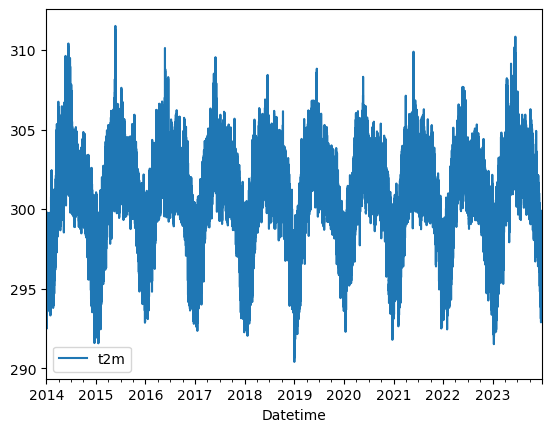

In [332]:
weather[["t2m"]].plot()
         

<Axes: xlabel='Datetime'>

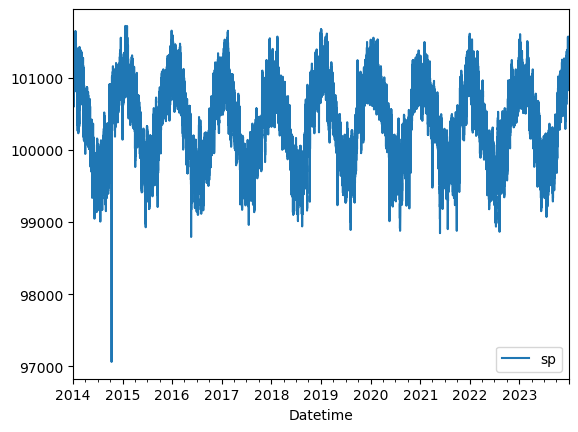

In [334]:
weather[["sp"]].plot()

In [336]:
weather["target_t2m"] = weather.shift(-1)["t2m"]


In [338]:
weather

t2m           sp  target_t2m
Datetime                                                
2014-01-01 00:00:00  293.341780  101116.9769  293.442359
2014-01-01 01:00:00  293.442359  101222.5298  294.382547
2014-01-01 02:00:00  294.382547  101276.9555  294.924795
2014-01-01 03:00:00  294.924795  101354.4708  295.413109
2014-01-01 04:00:00  295.413109  101387.4561  297.178331
...                         ...          ...         ...
2023-12-31 19:00:00  295.905076  101096.7733  295.357838
2023-12-31 20:00:00  295.357838  101049.9447  294.839707
2023-12-31 21:00:00  294.839707  100999.8300  294.544256
2023-12-31 22:00:00  294.544256  100980.9343  294.355051
2023-12-31 23:00:00  294.355051  100979.2912         NaN

[87648 rows x 3 columns]

In [342]:
weather = weather.iloc[:-1,:].copy()

In [344]:
weather

t2m           sp  target_t2m
Datetime                                                
2014-01-01 00:00:00  293.341780  101116.9769  293.442359
2014-01-01 01:00:00  293.442359  101222.5298  294.382547
2014-01-01 02:00:00  294.382547  101276.9555  294.924795
2014-01-01 03:00:00  294.924795  101354.4708  295.413109
2014-01-01 04:00:00  295.413109  101387.4561  297.178331
...                         ...          ...         ...
2023-12-31 18:00:00  296.012778  101103.3457  295.905076
2023-12-31 19:00:00  295.905076  101096.7733  295.357838
2023-12-31 20:00:00  295.357838  101049.9447  294.839707
2023-12-31 21:00:00  294.839707  100999.8300  294.544256
2023-12-31 22:00:00  294.544256  100980.9343  294.355051

[87647 rows x 3 columns]

In [382]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [384]:
predictors = ["t2m"]

In [386]:
train = weather.loc[:"2021-12-31 23:00"]

In [388]:
test = weather.loc["2022-01-01 00:00":]

In [390]:
reg.fit(train[predictors], train["target_t2m"])


Ridge(alpha=0.1)

In [392]:
predictions = reg.predict(test[predictors])

In [394]:
from sklearn.metrics import mean_absolute_error


In [396]:
mean_absolute_error(test["target_t2m"], predictions)

0.3875483457301934

In [398]:
combined = pd.concat([test["target_t2m"], pd.Series(predictions, index = test.index)], axis=1)
combined.columns = ["actual" , "predictions"]

In [400]:
combined


actual  predictions
Datetime                                    
2022-01-01 00:00:00  294.929053   295.015827
2022-01-01 01:00:00  295.647509   295.038780
2022-01-01 02:00:00  296.090873   295.743148
2022-01-01 03:00:00  296.404008   296.177820
2022-01-01 04:00:00  297.971148   296.484815
...                         ...          ...
2023-12-31 18:00:00  295.905076   296.101256
2023-12-31 19:00:00  295.357838   295.995666
2023-12-31 20:00:00  294.839707   295.459157
2023-12-31 21:00:00  294.544256   294.951186
2023-12-31 22:00:00  294.355051   294.661528

[17519 rows x 2 columns]

<Axes: xlabel='Datetime'>

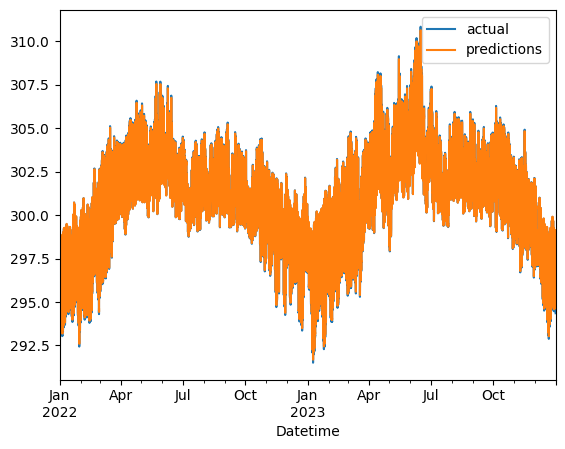

In [402]:
combined.plot()

In [404]:
reg.coef_

array([0.9803929])

In [370]:
weather["month_t2m"] = weather["t2m"].rolling(30).mean()
weather

t2m           sp  target_t2m   month_t2m
Datetime                                                            
2014-01-01 00:00:00  293.341780  101116.9769  293.442359         NaN
2014-01-01 01:00:00  293.442359  101222.5298  294.382547         NaN
2014-01-01 02:00:00  294.382547  101276.9555  294.924795         NaN
2014-01-01 03:00:00  294.924795  101354.4708  295.413109         NaN
2014-01-01 04:00:00  295.413109  101387.4561  297.178331         NaN
...                         ...          ...         ...         ...
2023-12-31 18:00:00  296.012778  101103.3457  295.905076  296.683824
2023-12-31 19:00:00  295.905076  101096.7733  295.357838  296.625317
2023-12-31 20:00:00  295.357838  101049.9447  294.839707  296.562248
2023-12-31 21:00:00  294.839707  100999.8300  294.544256  296.494620
2023-12-31 22:00:00  294.544256  100980.9343  294.355051  296.428689

[87647 rows x 4 columns]

In [380]:
weather["month_day_t2m"] = weather["month_t2m"]/ weather["t2m"]
weather

t2m           sp  target_t2m   month_t2m  \
Datetime                                                               
2014-01-02 06:00:00  299.140336  101256.3397  299.334204  295.583850   
2014-01-02 07:00:00  299.334204  101165.6302  299.781704  295.780244   
2014-01-02 08:00:00  299.781704  101037.8123  299.697160  295.960216   
2014-01-02 09:00:00  299.697160  100976.7896  298.733650  296.119295   
2014-01-02 10:00:00  298.733650  100965.2447  298.389643  296.229980   
...                         ...          ...         ...         ...   
2023-12-31 18:00:00  296.012778  101103.3457  295.905076  296.683824   
2023-12-31 19:00:00  295.905076  101096.7733  295.357838  296.625317   
2023-12-31 20:00:00  295.357838  101049.9447  294.839707  296.562248   
2023-12-31 21:00:00  294.839707  100999.8300  294.544256  296.494620   
2023-12-31 22:00:00  294.544256  100980.9343  294.355051  296.428689   

                     month_day_t2m  
Datetime                            
2014-01-02 06:00:00       0.988111  
2014-01-02 07:00:00       0.988127  
2014-01-02 08:00:00       0.987252  
2014-01-02 09:00:00       0.988062  
2014-01-02 10:00:00       0.991619  
...                            ...  
2023-12-31 18:00:00       1.002267  
2023-12-31 19:00:00       1.002434  
2023-12-31 20:00:00       1.004078  
2023-12-31 21:00:00       1.005613  
2023-12-31 22:00:00       1.006398  

[87617 rows x 5 columns]

In [374]:
weather = weather.iloc[30:,:].copy()
weather

t2m           sp  target_t2m   month_t2m  \
Datetime                                                               
2014-01-02 06:00:00  299.140336  101256.3397  299.334204  295.583850   
2014-01-02 07:00:00  299.334204  101165.6302  299.781704  295.780244   
2014-01-02 08:00:00  299.781704  101037.8123  299.697160  295.960216   
2014-01-02 09:00:00  299.697160  100976.7896  298.733650  296.119295   
2014-01-02 10:00:00  298.733650  100965.2447  298.389643  296.229980   
...                         ...          ...         ...         ...   
2023-12-31 18:00:00  296.012778  101103.3457  295.905076  296.683824   
2023-12-31 19:00:00  295.905076  101096.7733  295.357838  296.625317   
2023-12-31 20:00:00  295.357838  101049.9447  294.839707  296.562248   
2023-12-31 21:00:00  294.839707  100999.8300  294.544256  296.494620   
2023-12-31 22:00:00  294.544256  100980.9343  294.355051  296.428689   

                     month_day_t2m  
Datetime                            
2014-01-02 06:00:00       0.988111  
2014-01-02 07:00:00       0.988127  
2014-01-02 08:00:00       0.987252  
2014-01-02 09:00:00       0.988062  
2014-01-02 10:00:00       0.991619  
...                            ...  
2023-12-31 18:00:00       1.002267  
2023-12-31 19:00:00       1.002434  
2023-12-31 20:00:00       1.004078  
2023-12-31 21:00:00       1.005613  
2023-12-31 22:00:00       1.006398  

[87617 rows x 5 columns]

In [378]:
error = create_predictions(predictors, weather , reg)
error

KeyError: 'target_sp'

In [86]:
import pandas as pd
import os

# Path to the directory containing the CSV files
csv_dir = r"C:\Users\dell\wind_prediction_project\netcdf data visualization\data.csv"

# List of all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Dictionary to store DataFrames
weather_data = {}

# Iterate through each CSV file and process it
for csv_file in csv_files:
    file_path = os.path.join(csv_dir, csv_file)
    
    try:
        # Read the CSV file into a DataFrame
        weather = pd.read_csv(file_path, index_col="Datetime")
        
        # Convert 'Datetime' column to datetime format
        weather.index = pd.to_datetime(weather.index, format='%d-%m-%Y %H:%M')
        
        # Store the DataFrame in the dictionary
        weather_data[csv_file] = weather
        
        # Print the first few rows of the DataFrame to ensure it's read correctly
        print(f"Data from {csv_file}:")
        print(weather.head())
        
    except Exception as e:
        print(f"Error processing file {csv_file}: {e}")

print("Processing complete.")


Data from Agartala_data.csv:
                            t2m           sp
Datetime                                    
2014-01-01 00:00:00  285.165788  101363.5418
2014-01-01 01:00:00  285.113313  101455.9005
2014-01-01 02:00:00  284.614794  101525.1696
2014-01-01 03:00:00  294.331529  101549.9085
2014-01-01 04:00:00  295.112832  101583.7184
Data from Agra_data.csv:
                            t2m            sp
Datetime                                     
2014-01-01 00:00:00  287.801230   99927.03355
2014-01-01 01:00:00  287.681702   99956.72029
2014-01-01 02:00:00  287.565090  100061.44850
2014-01-01 03:00:00  286.983485  100137.31460
2014-01-01 04:00:00  286.304217  100188.44180
Data from Ahmedabad_data.csv:
                            t2m           sp
Datetime                                    
2014-01-01 00:00:00  286.853754  101254.6904
2014-01-01 01:00:00  286.980570  101316.5378
2014-01-01 02:00:00  287.429528  101368.4896
2014-01-01 03:00:00  288.776402  101464.9715
2014-01-0

In [88]:
weather["target_t2m"] = weather.shift(-1)["t2m"]
weather = weather.iloc[:-1, :].copy()
weather

t2m           sp  target_t2m
Datetime                                                
2014-01-01 00:00:00  293.341780  101116.9769  293.442359
2014-01-01 01:00:00  293.442359  101222.5298  294.382547
2014-01-01 02:00:00  294.382547  101276.9555  294.924795
2014-01-01 03:00:00  294.924795  101354.4708  295.413109
2014-01-01 04:00:00  295.413109  101387.4561  297.178331
...                         ...          ...         ...
2023-12-31 18:00:00  296.012778  101103.3457  295.905076
2023-12-31 19:00:00  295.905076  101096.7733  295.357838
2023-12-31 20:00:00  295.357838  101049.9447  294.839707
2023-12-31 21:00:00  294.839707  100999.8300  294.544256
2023-12-31 22:00:00  294.544256  100980.9343  294.355051

[87647 rows x 3 columns]

In [90]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.1)
predictors = ["t2m"]

train = weather.loc[:"2021-12-31 23:00"]
test = weather.loc["2022-01-01 00:00":]

reg.fit(train[predictors], train["target_t2m"])
predictions = reg.predict(test[predictors])

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test["target_t2m"], predictions))

combined = pd.concat([test["target_t2m"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
print(combined)


0.38756262066008157
                         actual  predictions
Datetime                                    
2022-01-01 00:00:00  294.929053   295.016043
2022-01-01 01:00:00  295.647509   295.038995
2022-01-01 02:00:00  296.090873   295.743341
2022-01-01 03:00:00  296.404008   296.177999
2022-01-01 04:00:00  297.971148   296.484985
...                         ...          ...
2023-12-31 18:00:00  295.905076   296.101437
2023-12-31 19:00:00  295.357838   295.995851
2023-12-31 20:00:00  294.839707   295.459359
2023-12-31 21:00:00  294.544256   294.951404
2023-12-31 22:00:00  294.355051   294.661755

[17519 rows x 2 columns]


In [92]:
# Define future dates (replace with actual future data if available)
future_dates = pd.date_range(start="2024-01-01", periods=24, freq='h')
future_data = pd.DataFrame(index=future_dates)

# Use the last available `t2m` value as a starting point for predictions
last_t2m_value = weather["t2m"].iloc[-1]
future_data["t2m"] = last_t2m_value

# Predict future `t2m` values
future_predictions_t2m = reg.predict(future_data[["t2m"]])

# Store predictions in a DataFrame
future_predictions = pd.DataFrame({
    "predicted_t2m": future_predictions_t2m
}, index=future_dates)

print(future_predictions)


                     predicted_t2m
2024-01-01 00:00:00     294.661755
2024-01-01 01:00:00     294.661755
2024-01-01 02:00:00     294.661755
2024-01-01 03:00:00     294.661755
2024-01-01 04:00:00     294.661755
2024-01-01 05:00:00     294.661755
2024-01-01 06:00:00     294.661755
2024-01-01 07:00:00     294.661755
2024-01-01 08:00:00     294.661755
2024-01-01 09:00:00     294.661755
2024-01-01 10:00:00     294.661755
2024-01-01 11:00:00     294.661755
2024-01-01 12:00:00     294.661755
2024-01-01 13:00:00     294.661755
2024-01-01 14:00:00     294.661755
2024-01-01 15:00:00     294.661755
2024-01-01 16:00:00     294.661755
2024-01-01 17:00:00     294.661755
2024-01-01 18:00:00     294.661755
2024-01-01 19:00:00     294.661755
2024-01-01 20:00:00     294.661755
2024-01-01 21:00:00     294.661755
2024-01-01 22:00:00     294.661755
2024-01-01 23:00:00     294.661755


In [94]:
import pandas as pd

# Define future dates for prediction (e.g., for the next 3 months)
future_dates = pd.date_range(start="2024-01-01", periods=24*30*6, freq='h')  # 3 months of hourly data
future_data = pd.DataFrame(index=future_dates)

# Use the last available `t2m` value as a starting point for predictions
last_t2m_value = weather["t2m"].iloc[-1]

# Create a column to store initial `t2m` values (can be the last known value or an average)
future_data["t2m"] = last_t2m_value

# Predict future `t2m` values
future_predictions_t2m = reg.predict(future_data[["t2m"]])

# Store predictions in a DataFrame
future_predictions = pd.DataFrame({
    "predicted_t2m": future_predictions_t2m
}, index=future_dates)

print(future_predictions)


                     predicted_t2m
2024-01-01 00:00:00     294.661755
2024-01-01 01:00:00     294.661755
2024-01-01 02:00:00     294.661755
2024-01-01 03:00:00     294.661755
2024-01-01 04:00:00     294.661755
...                            ...
2024-06-28 19:00:00     294.661755
2024-06-28 20:00:00     294.661755
2024-06-28 21:00:00     294.661755
2024-06-28 22:00:00     294.661755
2024-06-28 23:00:00     294.661755

[4320 rows x 1 columns]


In [96]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming `weather` DataFrame already exists and has a 't2m' column
# Create lag features
weather['t2m_lag1'] = weather['t2m'].shift(1)
weather['t2m_lag2'] = weather['t2m'].shift(2)
weather['t2m_lag3'] = weather['t2m'].shift(3)

# Drop rows with NaN values
weather = weather.dropna()

# Define features and target
X = weather[['t2m_lag1', 't2m_lag2', 't2m_lag3']]
y = weather['t2m']

# Train the model
reg = LinearRegression()
reg.fit(X, y)


LinearRegression()

In [3]:
!pip install cdsapi


In [9]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': '2m_temperature',
        'year': '2024',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            37.6, 68.7, 8.4,
            97.25,
        ],
        'format': 'netcdf',
    },
    'era5_wind_102024.nc')

2024-07-21 21:19:38,001 INFO Welcome to the CDS
2024-07-21 21:19:39,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-21 21:19:39,710 INFO Request is queued
2024-07-21 21:19:40,979 INFO Request is running
2024-07-21 21:26:37,208 INFO Request is completed
2024-07-21 21:26:37,255 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/adaptor.mars.internal-1721577341.9642193-9047-3-f0f25db3-cc6d-44f9-a8cc-0d55fc208b2e.nc to era5_wind_102024.nc (243.5M)
2024-07-21 21:27:09,345 WARNING Connection error: [HTTPSConnectionPool(host='download-0010-clone.copernicus-climate.eu', port=443): Max retries exceeded with url: /cache-compute-0010/cache/data4/adaptor.mars.internal-1721577341.9642193-9047-3-f0f25db3-cc6d-44f9-a8cc-0d55fc208b2e.nc (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000198D9DB0EF0>, 'Connection to download-0010-clone.copernicus-climate.e

Result(content_length=255343156,content_type=application/x-netcdf,location=https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/adaptor.mars.internal-1721577341.9642193-9047-3-f0f25db3-cc6d-44f9-a8cc-0d55fc208b2e.nc)

In [3]:
import dask.array as da
import xarray as xr
import pandas as pd

# Open the dataset with Dask
dataset = xr.open_dataset('era5_wind_102024.nc', chunks={'time': 100})

# Extract the t2m variable as a Dask array
t2m_2024data = dataset['t2m']

# Convert the Dask array to a DataFrame in chunks and write to CSV
csv_file = 't2m_2024data.csv'

# Open a file in write mode
with open(csv_file, 'w') as f:
    # Write the header
    f.write('time,latitude,longitude,t2m\n')
    
    # Process the data in chunks
    num_chunks = len(t2m_2024data.chunks[0])
    for i in range(num_chunks):
        start = i * t2m_2024data.chunks[0][0]
        stop = start + t2m_2024data.chunks[0][0]
        
        chunk_df = t2m_2024data.isel(time=slice(start, stop)).to_dataframe().reset_index()
        chunk_df.to_csv(f, index=False, header=False, mode='a')

print(f'Data successfully written to {csv_file}')



Data successfully written to t2m_2024data.csv


In [5]:
print(dataset)
print(dataset.dims)
print(dataset['t2m'].shape)


<xarray.Dataset> Size: 1GB
Dimensions:    (longitude: 115, latitude: 117, expver: 2, time: 4744)
Coordinates:
  * longitude  (longitude) float32 460B 68.7 68.95 69.2 ... 96.7 96.95 97.2
  * latitude   (latitude) float32 468B 37.4 37.15 36.9 36.65 ... 8.9 8.65 8.4
  * expver     (expver) int32 8B 1 5
  * time       (time) datetime64[ns] 38kB 2024-01-01 ... 2024-07-16T15:00:00
Data variables:
    t2m        (time, expver, latitude, longitude) float64 1GB dask.array<chunksize=(100, 2, 117, 115), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-21 15:55:52 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...
FrozenMappingWarningOnValuesAccess({'longitude': 115, 'latitude': 117, 'expver': 2, 'time': 4744})
(4744, 2, 117, 115)


In [438]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [440]:
# Replace with the actual file path to your CSV file
file_name = r"C:\Users\dell\wind_prediction_project\netcdf data visualization\data.csv\Agra_data.csv"

# Read the CSV file into a DataFrame
try:
    weather = pd.read_csv(file_name, parse_dates=['Datetime'], index_col='Datetime')
except FileNotFoundError:
    print(f"Data for {file_name} not found.")
    weather = None

if weather is not None:
    # Find rows with missing values in either 't2m' or 'sp' columns
    missing_t2m_sp_Agra = weather[pd.isnull(weather["t2m"]) | pd.isnull(weather["sp"])]
    # Display rows with missing 't2m' or 'sp' values
    print(missing_t2m_sp_Agra)
else:
    print("The data could not be loaded.")


Empty DataFrame
Columns: [t2m, sp]
Index: []


t2m           float64
sp            float64
target_t2m    float64
dtype: object
Index(['01-01-2014 00:00', '01-01-2014 01:00', '01-01-2014 02:00',
       '01-01-2014 03:00', '01-01-2014 04:00', '01-01-2014 05:00',
       '01-01-2014 06:00', '01-01-2014 07:00', '01-01-2014 08:00',
       '01-01-2014 09:00',
       ...
       '31-12-2023 13:00', '31-12-2023 14:00', '31-12-2023 15:00',
       '31-12-2023 16:00', '31-12-2023 17:00', '31-12-2023 18:00',
       '31-12-2023 19:00', '31-12-2023 20:00', '31-12-2023 21:00',
       '31-12-2023 22:00'],
      dtype='object', name='Datetime', length=87647)


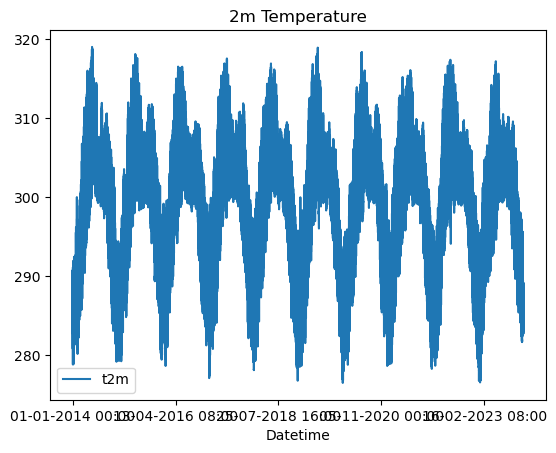

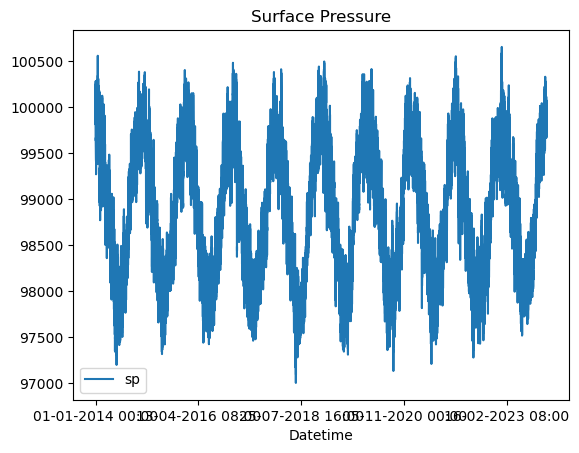

In [450]:
if weather is not None:
    # Display data types
    print(weather.dtypes)
    
    # Display the index
    print(weather.index)
    
    # Plot 't2m' over time
    weather[["t2m"]].plot(title="2m Temperature")
    plt.show()
    
    # Plot 'sp' over time
    weather[["sp"]].plot(title="Surface Pressure")
    plt.show()


In [452]:
if weather is not None:
    # Create target variable shifted by -1 hour
    weather["target_t2m"] = weather.shift(-1)["t2m"]
    
    # Remove the last row which has NaN in target_t2m
    weather = weather.iloc[:-1, :].copy()


In [460]:
    # Train a Ridge regression model
    reg = Ridge(alpha=0.1)
    predictors = ["t2m"]
    train = weather.loc[:"2021-12-31 23:00"]
    test = weather.loc["2022-01-01 00:00":]
    
    reg.fit(train[predictors], train["target_t2m"])
    
    # Make predictions
    predictions = reg.predict(test[predictors])
    
    # Calculate mean absolute error
    mae = mean_absolute_error(test["target_t2m"], predictions)
    print(f"Mean Absolute Error: {mae}")
    
    # Combine actual and predicted values into a DataFrame
    combined = pd.concat([test["target_t2m"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    print(combined)
    
    # Plot actual vs predictions
    combined.plot(title="Actual vs Predictions")
    plt.show()
    
    # Display model coefficients
    print(f"Model Coefficients: {reg.coef_}")


KeyError: '2021-12-31 23:00'